# Sales & Demand Forecasting for Businesses

## Objective
Build a machine learning model to forecast future sales using historical data
and present the results in a business-friendly way.

This project demonstrates how ML helps businesses:
- plan inventory
- manage cash flow
- optimize staffing
- avoid overstocking or losses


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Sample - Superstore.csv to Sample - Superstore.csv


In [7]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Convert date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Remove duplicates
df = df.drop_duplicates()

# Remove missing values
df = df.dropna()


In [11]:
daily_sales = (
    df.groupby('Order Date')['Sales']
    .sum()
    .reset_index()
)

daily_sales.head()


,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


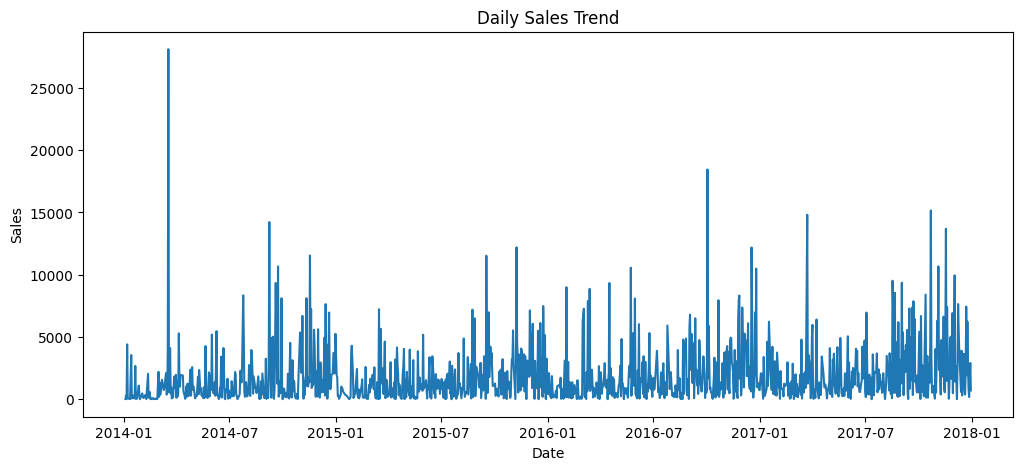

In [12]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [13]:
daily_sales['year'] = daily_sales['Order Date'].dt.year
daily_sales['month'] = daily_sales['Order Date'].dt.month
daily_sales['day'] = daily_sales['Order Date'].dt.day
daily_sales['day_of_week'] = daily_sales['Order Date'].dt.dayofweek

# Lag feature
daily_sales['lag_1'] = daily_sales['Sales'].shift(1)

daily_sales.dropna(inplace=True)
daily_sales.head()


,Order Date,Sales,year,month,day,day_of_week,lag_1
1,2014-01-04,288.060,2014,1,4,5,16.448
2,2014-01-05,19.536,2014,1,5,6,288.060
3,2014-01-06,4407.100,2014,1,6,0,19.536
4,2014-01-07,87.158,2014,1,7,1,4407.100
5,2014-01-09,40.544,2014,1,9,3,87.158


In [14]:
train_size = int(len(daily_sales) * 0.8)

train = daily_sales[:train_size]
test = daily_sales[train_size:]

X_train = train.drop(['Sales', 'Order Date'], axis=1)
y_train = train['Sales']

X_test = test.drop(['Sales', 'Order Date'], axis=1)
y_test = test['Sales']


In [15]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
predictions = model.predict(X_test)


In [17]:
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Mean Absolute Error (MAE): 1764.34
Root Mean Squared Error (RMSE): 2389.5


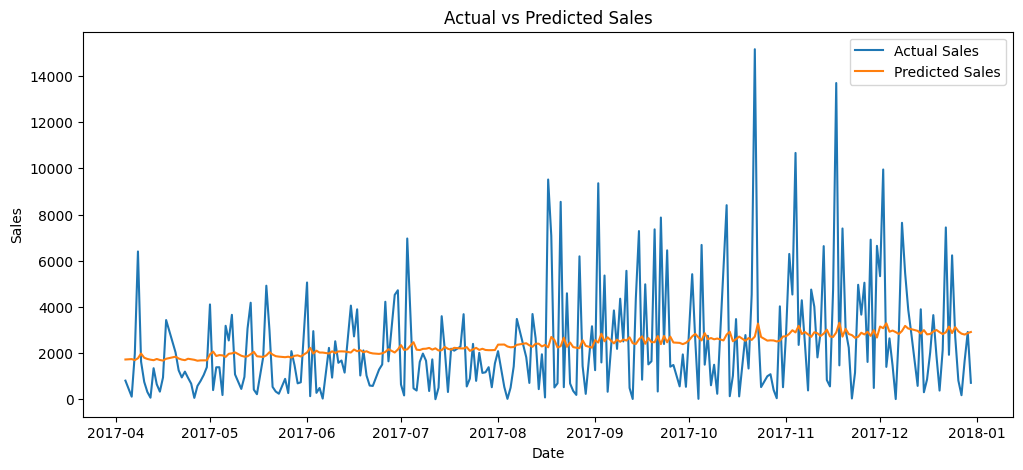

In [18]:
plt.figure(figsize=(12,5))
plt.plot(test['Order Date'], y_test.values, label="Actual Sales")
plt.plot(test['Order Date'], predictions, label="Predicted Sales")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [19]:
future_days = 30

future_dates = pd.date_range(
    start=daily_sales['Order Date'].max(),
    periods=future_days + 1,
    freq='D'
)[1:]

future_df = pd.DataFrame({'Order Date': future_dates})

future_df['year'] = future_df['Order Date'].dt.year
future_df['month'] = future_df['Order Date'].dt.month
future_df['day'] = future_df['Order Date'].dt.day
future_df['day_of_week'] = future_df['Order Date'].dt.dayofweek

# Use last known sales as lag
future_df['lag_1'] = daily_sales['Sales'].iloc[-1]


In [20]:
future_df['Predicted Sales'] = model.predict(
    future_df.drop('Order Date', axis=1)
)

future_df.head()


,Order Date,year,month,day,day_of_week,lag_1,Predicted Sales
0,2017-12-31,2017,12,31,6,713.79,2798.827655
1,2018-01-01,2018,1,1,0,713.79,1564.686299
2,2018-01-02,2018,1,2,1,713.79,1554.593822
3,2018-01-03,2018,1,3,2,713.79,1544.501346
4,2018-01-04,2018,1,4,3,713.79,1534.408869


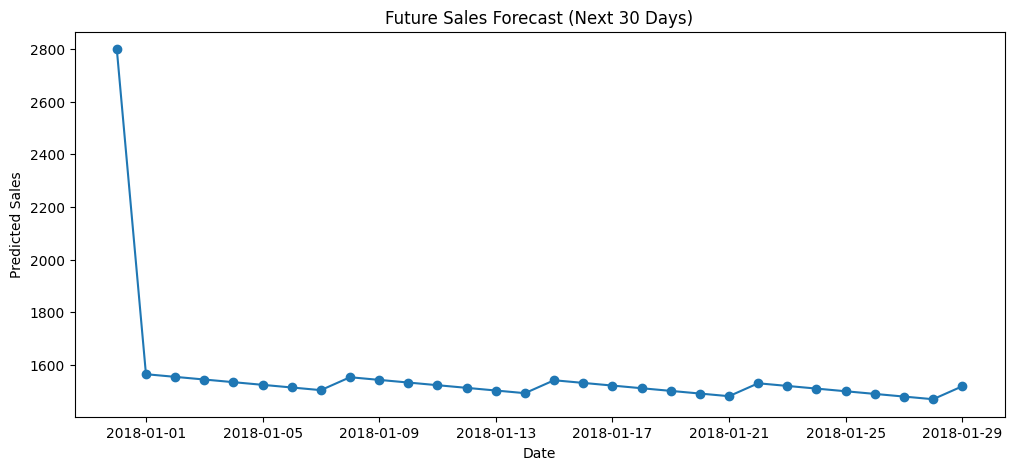

In [21]:
plt.figure(figsize=(12,5))
plt.plot(
    future_df['Order Date'],
    future_df['Predicted Sales'],
    marker='o'
)
plt.title("Future Sales Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.show()


In [22]:
# Historical actual + predicted
results_df = test[['Order Date', 'Sales']].copy()
results_df['Predicted Sales'] = predictions

# Future forecast
future_results = future_df[['Order Date', 'Predicted Sales']].copy()
future_results['Sales'] = None

# Combine
powerbi_df = pd.concat([results_df, future_results], ignore_index=True)
powerbi_df.head()


,Order Date,Sales,Predicted Sales
0,2017-04-04,808.4700,1724.036259
1,2017-04-06,114.4200,1741.424918
2,2017-04-07,1971.2905,1697.724304
3,2017-04-08,6401.9300,1777.547481
4,2017-04-09,1626.7100,1982.000845


In [26]:
powerbi_df.to_csv("FUTURE_ML_01.csv", index=False)


In [27]:
files.download("FUTURE_ML_01.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>